DOC constituents - EDA, pre-processing - Duration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
from palettable.colorbrewer.diverging import *

In [2]:
sns.set(style='whitegrid', palette="Spectral_r")
# dual_colors = [ '#009fca','#00f8b9'] #'#005e79',

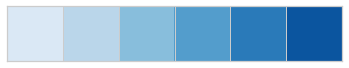

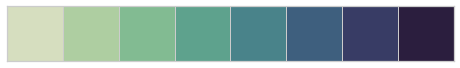

In [3]:
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
# dual_colors = [cpal[3],cpal[2]]
# sns.set_palette(cpal)
sns.palplot(cpal)
sns.palplot(cb_pal)

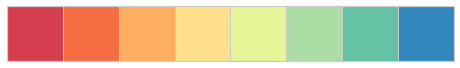

In [4]:
colors = Spectral_8.hex_colors
dual_colors = [colors[-1],colors[4]]
sns.palplot(colors)

In [5]:
df = pd.read_csv("../data/train.csv")

### Exploring duration

In [6]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [7]:
df.Duration.value_counts()

5       1623
6       1613
8       1548
7       1528
10      1504
4       1456
9       1455
11      1294
3       1237
12      1227
13      1109
2       1072
14      1037
16       996
15       959
19       932
17       901
18       897
20       793
21       723
22       659
23       657
365      642
27       634
25       616
24       608
26       587
1        577
28       571
34       528
        ... 
4815       1
305        1
301        1
332        1
425        1
459        1
331        1
490        1
298        1
336        1
337        1
4736       1
531        1
472        1
4609       1
547        1
311        1
342        1
740        1
4881       1
293        1
465        1
435        1
307        1
4784       1
434        1
529        1
497        1
4580       1
436        1
Name: Duration, Length: 439, dtype: int64

In [8]:
df.columns = df.columns.map(lambda x:x.lower())

In [9]:
df.head()

,id,agency,agency type,distribution channel,product name,duration,destination,net sales,commision (in value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [10]:
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [11]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [12]:
print(f"Minimum value : {df.duration.min()} \nMaximum value : {df.duration.max()} \nMean : {df.duration.mean()} \
        \nMedian : {df.duration.median()}")

Minimum value : -2 
Maximum value : 4881 
Mean : 58.2561078187727         
Median : 24.0


(0, 0.002)

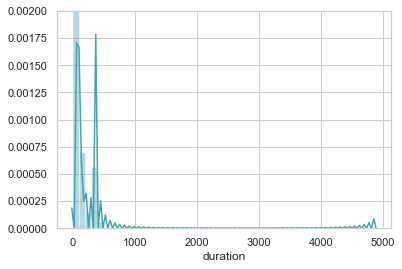

In [13]:
sns.distplot(df.duration)
plt.ylim((0,0.002))

### we get a very vague spread of duration.
#### One assumption I am making is the units may not be standardized. 
#### If we consider the units are in days, maximum number we have is 4881, so that is nearly 13.37 years. 
#### So they might be people who went for Job, one way to varify that is by checking which product they got and what age group belong to that category. 

In [14]:
#we are checking for the people who went for more than one year.
more_than_year = df[df.duration > 365]

In [15]:
more_than_year.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
31,6106,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,216.00,54.00,33,0
53,2406,C2B,Airlines,Online,Annual Gold Plan,391,SINGAPORE,449.25,112.31,32,0
74,3619,C2B,Airlines,Online,Annual Silver Plan,396,SINGAPORE,291.75,72.94,34,1
89,6679,C2B,Airlines,Online,Annual Silver Plan,369,SINGAPORE,216.00,54.00,35,0
108,3284,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,216.00,54.00,35,1


In [16]:
more_than_year.shape

(1966, 11)

In [17]:
print(f"Percent of people who spent more than a year = {np.round(more_than_year.shape[0]/df.shape[0]*100,2)}%")

Percent of people who spent more than a year = 3.76%


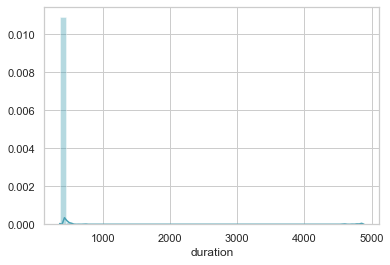

In [18]:
sns.distplot(more_than_year.duration)

In [19]:
#converting the duration to years
more_than_year["duration_year"] = more_than_year.duration.map(lambda x: int(x/365))

/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
more_than_year.groupby(["duration_year","product_name"])[["product_name"]].count().rename(columns={'product_name':'Counts'})

Counts
duration_year product_name                                
1             Annual Gold Plan                         176
              Annual Silver Plan                      1483
              Annual Travel Protect Gold               139
              Annual Travel Protect Platinum            41
              Annual Travel Protect Silver              81
              Bronze Plan                                3
              Child Comprehensive Plan                   3
              Individual Comprehensive Plan             22
              Rental Vehicle Excess Insurance            1
              Spouse or Parents Comprehensive Plan       7
2             Annual Silver Plan                         1
12            Ticket Protector                           3
13            Ticket Protector                           6

#### People had annual plans, so this answers the initial assumption of data of duration being in days.

In [21]:
more_than_year.groupby(["duration_year"])[["age"]].agg(["count","min","max","mean"])

age                   
              count min max       mean
duration_year                         
1              1956   5  88  39.606339
2                 1  36  36  36.000000
12                3  48  48  48.000000
13                6  48  48  48.000000

In [22]:
more_than_year.groupby(["duration_year","destination"])[["destination"]].count()

destination
duration_year destination               
1             AUSTRALIA                8
              CHINA                   57
              HONG KONG                3
              INDONESIA                6
              MALAYSIA                 1
              SINGAPORE             1683
              UNITED STATES          198
2             SINGAPORE                1
12            SINGAPORE                3
13            SINGAPORE                6

#### Majority people visited Singapore and all the people who went for more than 2 years went to Singapore.

In [23]:
more_than_year.groupby(["duration_year","destination"])[["net_sales"]].agg(["mean","count"])

net_sales      
                                   mean count
duration_year destination                    
1             AUSTRALIA       77.450000     8
              CHINA          189.909270    57
              HONG KONG       85.666667     3
              INDONESIA      142.450000     6
              MALAYSIA        86.000000     1
              SINGAPORE      236.117640  1683
              UNITED STATES  273.118347   198
2             SINGAPORE        0.000000     1
12            SINGAPORE        0.320000     3
13            SINGAPORE        0.288333     6

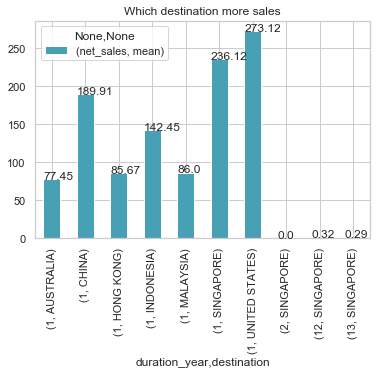

In [24]:
ax = more_than_year.groupby(["duration_year","destination"])[["net_sales"]].agg(["mean"]).plot(kind="bar")
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(np.round(h,2), (x,y+h))
plt.title("Which destination more sales")
plt.show()

In [25]:
more_than_year.groupby(["duration_year","destination","claim"])[["net_sales"]].agg(["mean"]).unstack()


net_sales            
                                   mean            
claim                                 0           1
duration_year destination                          
1             AUSTRALIA       77.450000         NaN
              CHINA          174.533333  203.747613
              HONG KONG       85.666667         NaN
              INDONESIA      142.450000         NaN
              MALAYSIA        86.000000         NaN
              SINGAPORE      222.091292  246.604630
              UNITED STATES  271.008247  275.144878
2             SINGAPORE        0.000000         NaN
12            SINGAPORE        0.320000         NaN
13            SINGAPORE        0.288333         NaN

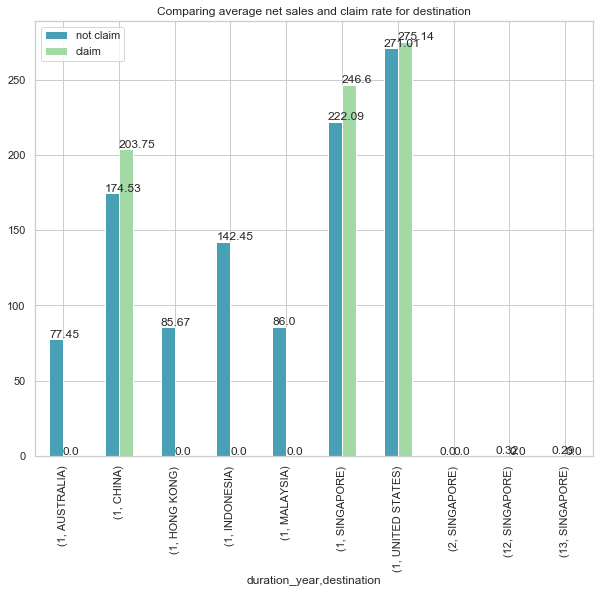

In [26]:
ax = more_than_year.groupby(["duration_year","destination","claim"])[["net_sales"]].agg(["mean"]).unstack().plot(kind="bar",figsize=(10,8))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(np.round(h,2),(x,y+h+1))
plt.legend(["not claim", "claim"],loc="upper left")
plt.title("Comparing average net sales and claim rate for destination")
plt.show()

In [27]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [28]:
less_than_year = df[df.duration <= 365]

In [29]:
less_than_year.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [30]:
less_than_year.shape

(50344, 11)

#### Mostly people choose to travel for less than a year.

 Minimum duration = -2
 Maximum duration = 365
 Mean duration = 44.97975925631654


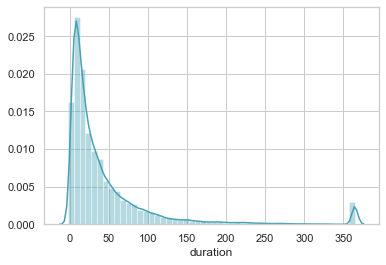

In [31]:
sns.distplot(less_than_year.duration)
print(f" Minimum duration = {less_than_year.duration.min()}")
print(f" Maximum duration = {less_than_year.duration.max()}")
print(f" Mean duration = {less_than_year.duration.mean()}")
plt.show()

#### Data duration in days is left shifted and mean in nearly 41 day, guessing the people like to travel in early months.

In [32]:
less_than_year["duration_month"] = less_than_year.duration.map(lambda x : int(x/31)+1)

/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
less_than_year.duration_month.value_counts()

1     29905
2     10143
3      4422
4      2199
12     1116
5      1005
6       568
7       401
8       298
9       160
10       81
11       46
Name: duration_month, dtype: int64

In [34]:
less_than_year.groupby(["duration_month","product_name"])[["product_name"]].agg(["count"])

product_name
                                                           count
duration_month product_name                                     
1              1 way Comprehensive Plan                     1834
               2 way Comprehensive Plan                     5469
               24 Protect                                    122
               Basic Plan                                   2568
               Bronze Plan                                  3465
               Cancellation Plan                            7939
               Comprehensive Plan                             95
               Gold Plan                                     298
               Premier Plan                                   68
               Rental Vehicle Excess Insurance              3857
               Silver Plan                                  1975
               Single Trip Travel Protect Gold               214
               Single Trip Travel Protect Platinum            81
               Single Trip Travel Protect Silver             100
               Ticket Protector                              306
               Travel Cruise Protect                         206
               Value Plan                                   1308
2              1 way Comprehensive Plan                      359
               2 way Comprehensive Plan                     2546
               24 Protect                                     25
               Basic Plan                                    836
               Bronze Plan                                   813
               Cancellation Plan                            2731
               Comprehensive Plan                             58
               Gold Plan                                      44
               Premier Plan                                   37
               Rental Vehicle Excess Insurance              1510
               Silver Plan                                   503
               Single Trip Travel Protect Gold                26
               Single Trip Travel Protect Platinum            12
...                                                          ...
9              Premier Plan                                    2
               Rental Vehicle Excess Insurance                23
               Silver Plan                                     2
               Ticket Protector                                4
               Value Plan                                      5
10             1 way Comprehensive Plan                        1
               2 way Comprehensive Plan                       27
               24 Protect                                      1
               Basic Plan                                      3
               Cancellation Plan                              37
               Comprehensive Plan                              2
               Rental Vehicle Excess Insurance                 7
               Silver Plan                                     1
               Ticket Protector                                2
11             2 way Comprehensive Plan                       12
               Basic Plan                                      4
               Cancellation Plan                              10
               Individual Comprehensive Plan                   6
               Rental Vehicle Excess Insurance                 8
               Ticket Protector                                4
               Value Plan                                      2
12             Annual Gold Plan                              119
               Annual Silver Plan                            864
               Annual Travel Protect Gold                     44
               Annual Travel Protect Platinum                  9
               Annual Travel Protect Silver                   11
               Child Comprehensive Plan                        5
               Individual Comprehensive Plan                  56
               Spouse 

### Which months they choose to travel?

#### Converting to weeks is still lot more data points, lets convert to months and try what insight we get.

In [35]:
less_than_year['duration_month'] = less_than_year.duration.map(lambda x: int(x/31)+1)

/Users/Aniket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
less_than_year.duration_month.value_counts()

1     29905
2     10143
3      4422
4      2199
12     1116
5      1005
6       568
7       401
8       298
9       160
10       81
11       46
Name: duration_month, dtype: int64

month = {1:"Jan", 2: "Feb", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "Agust", 9: "Sep",
        10: "Oct", 11:"Nov", 12: "Dec"}

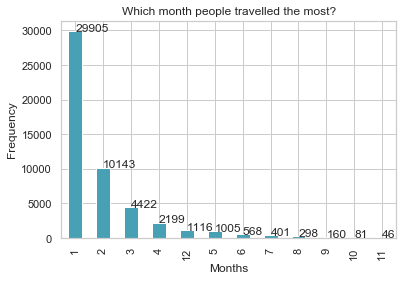

In [37]:
less_than_year.duration_month.value_counts().plot(kind="bar")
for num, counts in enumerate(less_than_year.duration_month.value_counts()):
    plt.text(num, counts, s = counts)
plt.title("Which month people travelled the most?")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

### Checking whether there are any anual plans in less than year data

In [38]:
less_than_year.groupby(["product_name"])[["product_name"]].count()

,product_name
product_name,
1 way Comprehensive Plan,2409
2 way Comprehensive Plan,10555
24 Protect,165
Annual Gold Plan,119
Annual Silver Plan,864
Annual Travel Protect Gold,44
Annual Travel Protect Platinum,9
Annual Travel Protect Silver,11
Basic Plan,4042


#### Checking for annual plans in less then year 

In [39]:
less_y_annual = less_than_year[less_than_year.product_name.str.startswith("Annual")]

In [40]:
less_y_annual.groupby(["product_name","duration"])[["duration"]].count().rename(columns={"duration":"counts"})

counts
product_name                   duration        
Annual Gold Plan               364           41
                               365           78
Annual Silver Plan             364          361
                               365          503
Annual Travel Protect Gold     364           15
                               365           29
Annual Travel Protect Platinum 364            6
                               365            3
Annual Travel Protect Silver   364            4
                               365            7

### The people who went for less than a year and had Annual plan actully went for nearly a year.
### This proves that units for dta 

### How many claims they made and how many claims got approved?

In [41]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [42]:
df.id.value_counts()

5696    20
2002    17
4515    17
9165    16
4080    16
2575    16
8528    16
8307    16
9275    16
4826    15
8056    15
9704    15
8318    15
7184    15
5851    15
8326    15
2615    15
2566    15
3896    15
2972    15
6350    15
5282    15
4794    15
9258    15
7138    15
4482    15
8253    15
2110    14
8128    14
8925    14
        ..
6659     1
3484     1
8720     1
2395     1
9925     1
3163     1
2386     1
2447     1
2939     1
2389     1
3391     1
9958     1
6756     1
8800     1
6946     1
3753     1
2441     1
7981     1
9027     1
3188     1
4624     1
4254     1
8556     1
7578     1
7533     1
6768     1
6748     1
2141     1
4172     1
3651     1
Name: id, Length: 7992, dtype: int64

In [43]:
more_than_year.groupby(["duration","product_name"])[["net_sales","commision_(in_value)"]].agg(["mean","count"])

net_sales        \
                                                     mean count   
duration product_name                                             
366      Annual Gold Plan                      381.567672    43   
         Annual Silver Plan                    221.155276   252   
         Annual Travel Protect Gold            258.342343    15   
         Annual Travel Protect Platinum        327.272997     5   
         Annual Travel Protect Silver          190.395000    10   
         Child Comprehensive Plan               74.000000     1   
         Individual Comprehensive Plan         118.404043     5   
         Spouse or Parents Comprehensive Plan   86.000000     2   
367      Annual Gold Plan                      374.080224    22   
         Annual Silver Plan                    228.859637   195   
         Annual Travel Protect Gold            269.828122     9   
         Annual Travel Protect Platinum        311.804880     1   
         Annual Travel Protect Silver          189.868491    13   
         Individual Comprehensive Plan          97.000000     3   
368      Annual Gold Plan                      330.660714    14   
         Annual Silver Plan                    232.425673   120   
         Annual Travel Protect Gold            272.245225    15   
         Annual Travel Protect Platinum        322.231250     5   
         Annual Travel Protect Silver          211.369519    14   
         Individual Comprehensive Plan          97.000000     4   
         Spouse or Parents Comprehensive Plan   86.000000     2   
369      Annual Gold Plan                      376.150000     4   
         Annual Silver Plan                    216.085420    77   
         Annual Travel Protect Gold            243.200000     6   
         Annual Travel Protect Platinum        404.250000     1   
         Annual Travel Protect Silver          204.600000     5   
         Child Comprehensive Plan               74.000000     2   
         Individual Comprehensive Plan          97.000000     2   
         Spouse or Parents Comprehensive Plan   86.000000     1   
370      Annual Gold Plan                      369.779299     7   
...                                                   ...   ...   
450      Annual Travel Protect Platinum        323.400000     1   
456      Annual Silver Plan                    201.925000     2   
457      Annual Silver Plan                    252.850000     1   
         Annual Travel Protect Silver          229.800000     1   
459      Annual Silver Plan                    216.000000     1   
463      Annual Travel Protect Silver          229.800000     1   
465      Annual Silver Plan                    216.000000     1   
466      Annual Travel Protect Silver          184.200000     2   
472      Annual Travel Protect Gold            204.600000     1   
474      Annual Silver Plan                    193.200000     1   
487      Annual Silver Plan                    252.850000     1   
488      Annual Gold Plan                      333.000000     1   
490      Annual Travel Protect Silver          229.800000     1   
494      Annual Travel Protect Silver          229.800000     1   
497      Annual Silver Plan                    259.200000     1   
508      Annual Silver Plan                    216.000000     2   
529      Annual Silver Plan                    216.000000     1   
531      Annual Travel Protect Silver          229.800000     1   
545      Annual Silver Plan                    161.000000     1   
547      Annual Silver Plan                    252.850000     1   
740      Annual Silver Plan                      0.000000     1   
4580     Ticket Protector                        0.320000     1   
4609     Ticket Protector                        0.320000     1   
4736     Ticket Protector                        0.320000     1   
4784     Ticket Protector                        0.320000     1   
4815     Ticket Protector                        0.320000     1   
4831     Ticket Protector   

In [44]:
df[df.id == 2000].groupby(['id','destination','product_name'])[["duration"]].mean()

duration
id   destination   product_name                             
2000 AUSTRALIA     2 way Comprehensive Plan               40
     JAPAN         Cancellation Plan                      51
     MALAYSIA      2 way Comprehensive Plan                9
                   Rental Vehicle Excess Insurance        55
     SINGAPORE     Silver Plan                            11
     UNITED STATES 2 way Comprehensive Plan               68

#### One unique id may belong to one traveller.
#### Duration in our data is realated to vaidity of insurance while might equal number of days traveller spent.
#### Except for product "Ticket Protector", the duration values seems to be very high. No concret inference can be made about the unit of duration.  

In [57]:
pd.pivot_table(df[df.product_name=="Ticket Protector"], index=["destination", "product_name"], 
               values=["duration"]).reset_index()

,destination,product_name,duration
0,SINGAPORE,Ticket Protector,113.529487


In [46]:
pd.pivot_table(df[df.product_name=="Ticket Protector"], index=['agency_type',"destination", "product_name"], 
               values=["duration"]).reset_index()

,agency_type,destination,product_name,duration
0,Airlines,SINGAPORE,Ticket Protector,113.529487


#### Ticket Protection product is only found for agency type "Airlines" and destination "Singapore".

In [47]:
df[df.product_name=="Ticket Protector"].groupby(["agency_type","destination","product_name","claim"])[["claim"]].count()

claim
agency_type destination product_name     claim       
Airlines    SINGAPORE   Ticket Protector 0        723
                                         1         57

In [60]:
df[df.product_name=="Ticket Protector"].groupby(['agency_type',"destination", "product_name"])[["duration"]].agg([
                                                                "min","max","mean","median"])

duration                         
                                              min   max        mean median
agency_type destination product_name                                      
Airlines    SINGAPORE   Ticket Protector        0  4881  113.529487     43

In [49]:
df[df.id==3123].groupby(["id", "agency_type","destination","product_name"])[["duration"]].sum()

duration
id   agency_type   destination product_name                      
3123 Airlines      HONG KONG   Basic Plan                       8
                   SINGAPORE   Bronze Plan                      7
                               Silver Plan                     15
                               Ticket Protector              4881
     Travel Agency CHINA       2 way Comprehensive Plan        21
                   MYANMAR     Cancellation Plan               44
                   SINGAPORE   Cancellation Plan               32
                   THAILAND    2 way Comprehensive Plan        22

In [50]:
df.shape

(52310, 11)

In [51]:
tp = df[df.product_name=="Ticket Protector"].groupby(['id','product_name',"duration"])[["duration"]].sum() 

In [52]:
tp.columns = ["all_duration"]

In [53]:
tp.reset_index(inplace = True)

In [54]:
tp[tp.all_duration > 600].drop("all_duration", axis = 1)

,id,product_name,duration
103,3123,Ticket Protector,4881
105,3165,Ticket Protector,4844
177,3927,Ticket Protector,4847
201,4113,Ticket Protector,4831
261,4682,Ticket Protector,4784
326,5331,Ticket Protector,4609
372,5697,Ticket Protector,4815
477,6734,Ticket Protector,4580
733,9512,Ticket Protector,4736


#### Only 9 data points out the whole dataset have very have duration values, hence these rows can be dropped.

#### To diffrentiate between different trips (i.e., for same product name, destination combination) for the same person, additional data for fight number and departure/arrival date would have been usefull. 


In [55]:
less_than_year['product_name'].unique()

array(['Cancellation Plan', 'Rental Vehicle Excess Insurance',
       '2 way Comprehensive Plan', 'Basic Plan', 'Bronze Plan',
       'Silver Plan', '1 way Comprehensive Plan', 'Value Plan',
       'Travel Cruise Protect', 'Comprehensive Plan',
       'Annual Silver Plan', 'Single Trip Travel Protect Gold',
       'Single Trip Travel Protect Silver', 'Ticket Protector',
       '24 Protect', 'Gold Plan', 'Single Trip Travel Protect Platinum',
       'Premier Plan', 'Annual Travel Protect Platinum',
       'Annual Gold Plan', 'Annual Travel Protect Gold',
       'Individual Comprehensive Plan', 'Annual Travel Protect Silver',
       'Child Comprehensive Plan', 'Spouse or Parents Comprehensive Plan'],
      dtype=object)

#### Duration:
* Duration is in days
* Duration is validity of the plan (product)-
    * Annual - year validity + extended period?
    * Not Annual - duration of trip/ duration of plan(could be extended)